In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preperation

In [3]:
X_train = pd.read_csv("B_train.csv")
X_train_f = X_train.drop(["Unnamed: 0", "X",  "class"], axis = 1)

In [4]:
B_test_path = "B_test.csv" 
X_test = pd.read_csv(B_test_path)
X_test_f = X_test.drop(["Unnamed: 0", "X", "class"], axis = 1)

In [5]:
label = []
for i in X_train["class"]:
  if i == "pos":
    label.append(1)
  else:
    label.append(0)

In [6]:
test_label = []
for i in X_test["class"]:
  if i == "pos":
    test_label.append(1)
  else:
    test_label.append(0)

Unscaled PCA

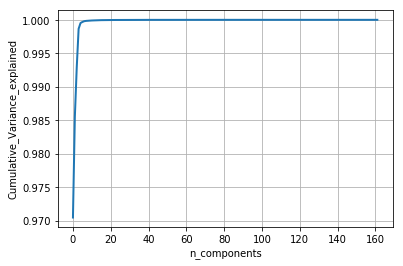

In [7]:
#component 개수 설정
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_f)
exp_var =  np.cumsum(pca.explained_variance_ratio_)

plt.clf()  
plt.plot(exp_var ,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  

plt.show()

exp_var

#PCA : n=1
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit_transform(X_train_f)
#pca.transform(X_test)

#PCA : n=20
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
unsc_pca = pca.fit_transform(X_train_f)
#pca.transform(X_test)

No handles with labels found to put in legend.


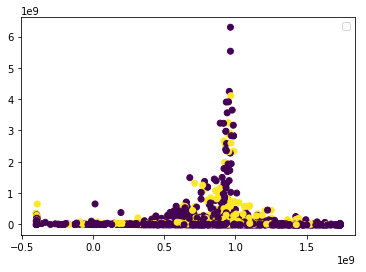

In [8]:
import matplotlib.pyplot as plt

plt.scatter(unsc_pca[:, 0], unsc_pca[:, 1], c= label)
plt.legend()
plt.show()

Oversampling

In [9]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
A_os, A_label_os = oversample.fit_resample(unsc_pca,np.array(label))

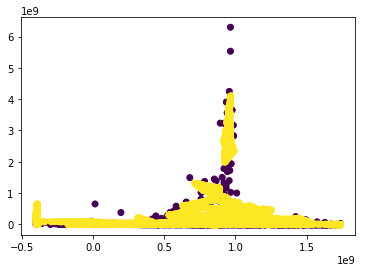

In [10]:
plt.scatter(A_os[:, 0], A_os[:, 1], c= A_label_os)
plt.show()

Model Random Forest CV

In [26]:
CV_rfc1.cv_results_

{'mean_fit_time': array([   9.46900487,   18.41837664,   91.31733994,   16.25397563,
          32.26927133,  162.14197874,   20.88572698,   41.28307629,
         204.01188416]),
 'mean_score_time': array([ 0.30549998,  0.58720708,  2.47322874,  0.36584873,  0.6501688 ,
         3.20318813,  0.3868546 ,  0.6695159 ,  2.65733991]),
 'mean_test_score': array([ 0.93832201,  0.93827738,  0.93854516,  0.9622769 ,  0.96234385,
         0.96247773,  0.97513024,  0.97504099,  0.97504098]),
 'param_max_depth': masked_array(data = [5 5 5 10 10 10 15 15 15],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [500 1000 5000 500 1000 5000 500 1000 5000],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': [{'max_depth': 5, 'n_estimators': 500},
  {'max_depth': 5, 'n_estimators': 1000},
  {'max_depth': 5, 'n_estimators': 5000},
  {'max_depth': 10

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 2020, n_jobs = 8)
param_grid = { 
    'n_estimators' : [500, 1000, 5000],
    'max_depth' : [5,10,15]
}

CV_rfc_unsc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc_unsc.fit(A_os, A_label_os)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=8, random_state=2020),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000, 5000]})

In [35]:
CV_rfc_unsc.best_params_

{'max_depth': 15, 'n_estimators': 1000}

In [36]:
CV_rfc_unsc.best_score_

0.97442734340511306

In [61]:
CV_rfc_unsc.cv_results_

{'mean_fit_time': array([   9.7534008 ,   18.89460521,   92.33965964,   16.49852548,
          32.52818694,  161.57422891,   21.02213259,   41.2471252 ,
         204.21676517]),
 'mean_score_time': array([ 0.38625669,  0.66876497,  3.02005358,  0.40694637,  0.70823665,
         3.02043953,  0.38712568,  0.72888231,  3.14069743]),
 'mean_test_score': array([ 0.93879064,  0.93879064,  0.93904726,  0.9622546 ,  0.96225459,
         0.96247774,  0.97528647,  0.97526415,  0.97535341]),
 'param_max_depth': masked_array(data = [5 5 5 10 10 10 15 15 15],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [500 1000 5000 500 1000 5000 500 1000 5000],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': [{'max_depth': 5, 'n_estimators': 500},
  {'max_depth': 5, 'n_estimators': 1000},
  {'max_depth': 5, 'n_estimators': 5000},
  {'max_depth': 10

In [15]:
from sklearn.metrics import accuracy_score

y_pred_rf = CV_rfc_unsc.predict(pca.transform(X_test_f))
accuracy_score(test_label, y_pred_rf)

0.96622807017543855

In [16]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true= test_label, y_pred = y_pred_rf).ravel()
fp * 10 + fn * 500

15610

In [17]:
confusion_matrix(y_true= test_label, y_pred = y_pred_rf)

array([[10785,   361],
       [   24,   230]])

Unscaled Logistic Regression with elastic net

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

Elog = SGDClassifier(loss='log', penalty='elasticnet', max_iter = 10000, n_jobs = 12)
elog_grid = { 
    'alpha': [1, 0.01, 0.0001],
    'l1_ratio' : [0.25, 0.5, 0.75]
}

CV_elog_unsc = GridSearchCV(estimator = Elog, param_grid = elog_grid, cv = 5)
CV_elog_unsc.fit(A_os, A_label_os)

/home/Kyusun.Cho.conda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=5,
             estimator=SGDClassifier(loss='log', max_iter=10000, n_jobs=12,
                                     penalty='elasticnet'),
             param_grid={'alpha': [1, 0.01, 0.0001],
                         'l1_ratio': [0.25, 0.5, 0.75]})

In [72]:
CV_elog_unsc.best_params_

{'alpha': 1, 'l1_ratio': 0.75}

In [73]:
CV_elog_unsc.best_score_

0.90217192235054033

In [74]:
CV_elog_unsc.cv_results_

{'mean_fit_time': array([  3.25909061,   3.04359064,  56.66551113,   3.04602971,
          3.28040605,   3.86920404,   3.44418616,   2.99756327,   3.30275044]),
 'mean_score_time': array([ 0.00888963,  0.00844688,  0.00253735,  0.00243287,  0.00235319,
         0.0070087 ,  0.00878596,  0.00964403,  0.00929885]),
 'mean_test_score': array([ 0.89881405,  0.75786762,  0.90217192,  0.72609782,  0.83603339,
         0.84713419,  0.84360639,  0.79073352,  0.88767869]),
 'param_alpha': masked_array(data = [1 1 1 0.01 0.01 0.01 0.0001 0.0001 0.0001],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'param_l1_ratio': masked_array(data = [0.25 0.5 0.75 0.25 0.5 0.75 0.25 0.5 0.75],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': [{'alpha': 1, 'l1_ratio': 0.25},
  {'alpha': 1, 'l1_ratio': 0.5},
  {'alpha': 1, 'l1_ratio': 0.75},
  {'alpha': 0.01, 'l1_ratio': 0.25},
  {'alpha': 

In [19]:
from sklearn.metrics import accuracy_score

y_pred_log = CV_elog_unsc.predict(pca.transform(X_test_f))
accuracy_score(test_label, y_pred_log)

0.2112280701754386

In [20]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true= test_label, y_pred = y_pred_log).ravel()
fp * 10 + fn * 500

96780

In [22]:
confusion_matrix(y_true= test_label, y_pred = y_pred_log)

array([[2168, 8978],
       [  14,  240]])

SVM

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

SVC = SVC(random_state = 2020)
svc_grid = { 
    'C' : [1, 100],
    'kernel': ["linear", "poly", "rbf"],
}

CV_svc_unsc = GridSearchCV(estimator = SVC, param_grid = svc_grid, cv = 5)
CV_svc_unsc.fit(A_os, A_label_os)

NameError: name 'A_os' is not defined

Scaled PCA

In [23]:
# Scale Data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_f)

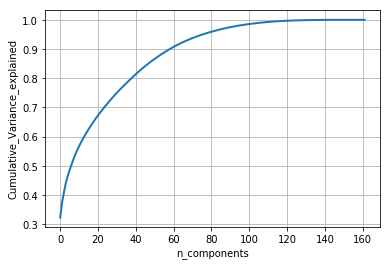

In [24]:
#component 개수 설정
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_sc)
exp_var =  np.cumsum(pca.explained_variance_ratio_)

plt.clf()  
plt.plot(exp_var ,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  

plt.show()



In [25]:
exp_var

from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
B_pca = pca.fit_transform(X_train_sc)
#pca.transform(X_test)

In [26]:
B_pca

array([[-0.76456978, -0.42258922, -0.08818294, ...,  0.05781932,
        -0.32330255, -0.03342036],
       [-1.54565806, -0.04753652, -0.37428056, ...,  0.12951007,
        -0.29416918,  0.02302955],
       [ 8.33572572, -3.46575483,  2.60226816, ...,  0.56460407,
         0.71011875,  0.3522482 ],
       ..., 
       [-3.03960584,  0.31223967,  0.42987315, ...,  0.07995206,
        -0.26652925,  0.05965757],
       [-3.31470043,  0.50773515,  0.91119428, ..., -0.03792642,
         0.18272429, -0.01030245],
       [-1.22207477, -0.23193124,  0.21520643, ...,  0.07267633,
        -0.23221249, -0.12959509]])

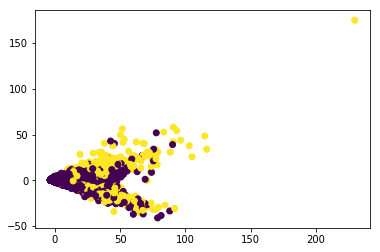

In [27]:
import matplotlib.pyplot as plt

plt.scatter(B_pca[:, 0], B_pca[:, 1], c= label)
plt.show()

Oversampling

In [28]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
B_os, label_os = oversample.fit_resample(B_pca,np.array(label))

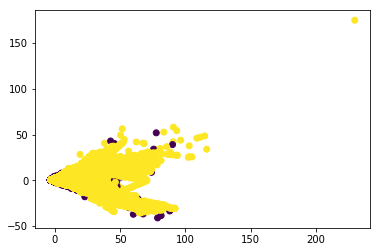

In [29]:
plt.scatter(B_os[:, 0], B_os[:, 1], c= label_os)
plt.show()

Model Random Forest CV

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 2020, n_jobs = 8)
param_grid = { 
    'n_estimators' : [500, 1000, 5000],
    'max_depth' : [5,10,15]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(B_os, label_os)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=8, random_state=2020),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000, 5000]})

In [41]:
CV_rfc.best_params_

{'max_depth': 15, 'n_estimators': 500}

In [42]:
CV_rfc.best_score_

0.95980503508170778

In [43]:
CV_rfc.cv_results_

{'mean_fit_time': array([  16.31772037,   31.7090817 ,  160.20441895,   28.82408066,
          57.20992827,  283.10439243,   36.43010097,   73.24724054,
         363.86966071]),
 'mean_score_time': array([ 0.30899458,  0.56748362,  2.94409847,  0.4101378 ,  0.7136344 ,
         2.7435987 ,  0.326968  ,  0.75308423,  3.24614229]),
 'mean_test_score': array([ 0.92618966,  0.92601091,  0.92575397,  0.94892385,  0.9487451 ,
         0.94868925,  0.95980504,  0.95953692,  0.95972683]),
 'param_max_depth': masked_array(data = [5 5 5 10 10 10 15 15 15],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [500 1000 5000 500 1000 5000 500 1000 5000],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': [{'max_depth': 5, 'n_estimators': 500},
  {'max_depth': 5, 'n_estimators': 1000},
  {'max_depth': 5, 'n_estimators': 5000},
  {'max_depth': 10

In [32]:
from sklearn.metrics import accuracy_score

y_pred_rf = CV_rfc.predict(pca.transform(X_test_f))
accuracy_score(test_label, y_pred_rf)

0.97771929824561399

In [33]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true= test_label, y_pred = y_pred_rf).ravel()
fp * 10 + fn * 500

127000

In [34]:
confusion_matrix(y_true= test_label, y_pred = y_pred_rf)

array([[11146,     0],
       [  254,     0]])